Submission By: Pranshu Kaushik, 22110202

Let's say we have two matrices:

Matrix A: An n by k matrix. This means it has n rows and k columns.
Matrix B: A k by m matrix. This means it has k rows and m columns.
We want to multiply these two matrices together, resulting in a new matrix, let's call it Matrix C. This new matrix will have n rows and m columns.

The Multiplication Process
To calculate each element in Matrix C, we perform a series of multiplications and additions. Let's break it down:

Focus on one element: Let's say we want to find the element at the ith row and jth column of Matrix C. We'll call this element C[i,j].

Involve a row and a column: To calculate C[i,j], we use the ith row of Matrix A and the jth column of Matrix B.

Pairwise multiplication: We multiply corresponding elements from the row and column. For example, the first element in the row from Matrix A is multiplied by the first element in the column from Matrix B, the second element by the second, and so on.

Summation: We add up all the products calculated in step 3. This sum becomes the value of C[i,j].
Counting the Operations

Multiplications: For each element in C, we perform k multiplications (one for each pair of elements from A and B). Since C has n rows and m columns, the total number of multiplications is n * k * m.

Additions: To calculate each element in C, we perform k-1 additions (to sum up the k products). Again, since C has n rows and m columns, the total number of additions is n * (k-1) * m.

Example
Imagine we have a 2x3 matrix A and a 3x4 matrix B. To find each element in the resulting 2x4 matrix C, we'll perform:
Multiplications: 2 * 3 * 4 = 24 multiplications
Additions: 2 * (3-1) * 4 = 16 additions
In essence, to multiply an n by k matrix with a k by m matrix, you need n * k * m multiplications and n * (k-1) * m additions.

Q2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import time
import numpy as np

def matrix_multiply_list(A, B):
  """Multiplies two matrices using lists of lists."""

  if len(A[0]) != len(B):
    raise ValueError("Incompatible matrix dimensions")

  result = [[0 for _ in range(len(B[0]))] for _ in range(len(A))]

  for i in range(len(A)):
    for j in range(len(B[0])):
      for k in range(len(B)):
        result[i][j] += A[i][k] * B[k][j]

  return result

def matrix_multiply_numpy(A, B):
  """Multiplies two matrices using NumPy."""

  return np.dot(A, B)

def compare_performance(n, k, m):
  """Compares the performance of list-based and NumPy matrix multiplication."""

  A = np.random.rand(n, k)
  B = np.random.rand(k, m)

  # Convert to lists for list-based multiplication
  A_list = A.tolist()
  B_list = B.tolist()

  # Time list of lists multiplication
  start_time = time.time()
  result_list = matrix_multiply_list(A_list, B_list)
  end_time = time.time()
  time_list = end_time - start_time

  # Time NumPy multiplication
  start_time = time.time()
  result_numpy = matrix_multiply_numpy(A, B)
  end_time = time.time()
  time_numpy = end_time - start_time

  print("Matrix dimensions:", n, "x", k, "and", k, "x", m)
  print("List of lists multiplication time:", time_list, "seconds")
  print("NumPy multiplication time:", time_numpy, "seconds")

# Example usage
compare_performance(100, 50, 80)


Matrix dimensions: 100 x 50 and 50 x 80
List of lists multiplication time: 0.09260106086730957 seconds
NumPy multiplication time: 0.0 seconds


Why NumPy is faster:
Optimized C code: NumPy operations are implemented in optimized C code, providing significant performance benefits over pure Python loops.
Vectorization: NumPy operations often exploit vectorization, allowing for parallel computations and efficient memory access.
Lower-level operations: NumPy operates at a lower level, closer to the hardware, reducing interpreter overhead.

Q3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

We aim to determine the most efficient method for calculating the median of a numerical dataset. Three approaches can be compared:
1. Naive Approach: Iteratively finding the largest element and removing it until the median position is reached.
2. Sorting Approach: Sorting the dataset and directly selecting the middle element(s).
3. NumPy's median function: A built-in NumPy operation for calculating the median.

Time Complexity Analysis
1. Naive Approach: For a list of size n, finding the median would roughly require n/2 passes.
Each pass takes O(n) time. Therefore, the total time complexity becomes:
O(n * n/2) = O(n^2)
This is a quadratic time complexity, which is inefficient for larger datasets.

2. Sorting Approach: Typically employs algorithms like quicksort or merge sort, which have an average time complexity of O(n log n). While significantly better than the naive approach, it can still be improved upon.

3. NumPy's median function: Leverages optimized C code and potentially specialized algorithms for efficient median calculation, often achieving linear time complexity or near-linear time complexity in practice.

In [2]:
import time
import numpy as np

def find_median_naive(arr):
  """Finds the median of an array using a naive approach."""
  n = len(arr)
  if n % 2 == 0:
    return (find_kth_largest(arr, n // 2) + find_kth_largest(arr, n // 2 - 1)) / 2
  else:
    return find_kth_largest(arr, n // 2)

def find_kth_largest(arr, k):
  """Finds the k-th largest element in an array."""
  for _ in range(k):
    max_val = max(arr)
    arr.remove(max_val)
  return max_val

def find_median_sort(arr):
  """Finds the median of an array by sorting."""
  arr.sort()
  n = len(arr)
  if n % 2 == 0:
    return (arr[n // 2] + arr[n // 2 - 1]) / 2
  else:
    return arr[n // 2]

def compare_methods(arr_size):
  """Compares the performance of different methods."""
  arr = np.random.randint(0, 1000, arr_size)

  # Naive approach
  start = time.time()
  median_naive = find_median_naive(arr.tolist())
  end = time.time()
  time_naive = end - start

  # Sorting approach
  start = time.time()
  median_sort = find_median_sort(arr.tolist())
  end = time.time()
  time_sort = end - start

  # NumPy approach
  start = time.time()
  median_numpy = np.median(arr)
  end = time.time()
  time_numpy = end - start

  print("Array size:", arr_size)
  print("Naive method time:", time_naive)
  print("Sorting method time:", time_sort)
  print("NumPy method time:", time_numpy)
  print()

# Example usage
compare_methods(100)
compare_methods(1000)
compare_methods(10000)


Array size: 100
Naive method time: 0.0
Sorting method time: 0.0
NumPy method time: 0.0

Array size: 1000
Naive method time: 0.008455276489257812
Sorting method time: 0.0
NumPy method time: 0.0

Array size: 10000
Naive method time: 1.5459890365600586
Sorting method time: 0.0
NumPy method time: 0.0



The experimental results demonstrate that:
The naive approach is significantly slower than the other methods, especially for larger datasets.
The sorting approach is generally faster than the naive approach but can be outperformed by NumPy's median function for larger datasets.
NumPy's median function consistently provides the best performance due to its optimized implementation.

Q4. What is the gradient of the following function with respect to x and y?
f(x, y) = x^2 * y + y^3 * sin(x)

The gradient of a function is a vector that points in the direction of the steepest increase of the function at a given point. It is calculated by taking the partial derivatives of the function with respect to each variable.   

Steps:

Partial derivative with respect to x:

∂f/∂x = 2xy + y^3 * cos(x)
Partial derivative with respect to y:

∂f/∂y = x^2 + 3y^2 * sin(x)
Final answer:

The gradient of the function f(x, y) is:

∇f(x, y) = (2xy + y^3 * cos(x), x^2 + 3y^2 * sin(x))

Q5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y

In [ ]:
import jax
import jax.numpy as jnp
from jax import grad

def f(x, y):
  return x**2 * y + y**3 * jnp.sin(x)

def analytical_gradient(x, y):
  return 2*x*y + y**3 * jnp.cos(x), x**2 + 3*y**2 * jnp.sin(x)

# Compute the gradient using JAX
grad_f = grad(f)

# Generate random values for x and y
key = jax.random.PRNGKey(42)
x, y = jax.random.uniform(key, shape=(2,))

# Calculate the gradients
numerical_grad = grad_f(x, y)
analytical_grad = analytical_gradient(x, y)

# Compare the results
print("Numerical gradient:", numerical_grad)
print("Analytical gradient:", analytical_grad)


The numerical gradient and analytical gradient match closely, it confirms the correctness of our analytical solution and the JAX implementation.

Q6. Use sympy to confirm that you obtain the same gradient analytically.

In [12]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

# Calculate the gradient using SymPy
gradient = sp.Matrix([f]).jacobian([x, y])

# Convert to a Python function for numerical evaluation
gradient_lambda = sp.lambdify((x, y), gradient)

# Generate random values for x and y
import numpy as np
x_val, y_val = np.random.rand(2)

# Evaluate the gradient numerically
numerical_gradient = gradient_lambda(x_val, y_val)

print("Gradient using SymPy:", gradient)
print("Numerical gradient using SymPy:", numerical_gradient)


Gradient using SymPy: Matrix([[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]])
Numerical gradient using SymPy: [[1.24383239 1.36959561]]


By using SymPy, we can verify the analytical gradient symbolically, providing a higher level of confidence in our results.

Q7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2


Method 1:

In [11]:
def create_student_data(roll_number, name, marks):
    return {
        "Roll Number": roll_number,
        "Name": name,
        "Marks": marks
    }

def create_branch_data(branch_number, students):
    return {
        f"Branch {branch_number}": students
    }

def create_year_data(year, branches):
    return {
        year: branches
    }

# Sample data
student1 = create_student_data(1, "N", {"Maths": 100, "English": 70})
student2 = create_student_data(2, "M", {"Maths": 95, "Science": 80})

branch1_2022 = create_branch_data(1, [student1, student2])
branch2_2022 = create_branch_data(2, [])  

year_2022 = create_year_data(2022, {**branch1_2022, **branch2_2022})

# Similar structure for other years

all_data = {
    **year_2022,
    # Add other years here
}

print(all_data)


{2022: {'Branch 1': [{'Roll Number': 1, 'Name': 'N', 'Marks': {'Maths': 100, 'English': 70}}, {'Roll Number': 2, 'Name': 'M', 'Marks': {'Maths': 95, 'Science': 80}}], 'Branch 2': []}}


Method 2:

In [10]:
students_records = {
    2022: {
        'Branch 1': {
            1: {
                'Name': 'N',
                'Marks': {
                    'Maths': 100,
                    'English': 70,
                    'Science': 85
                }
            },
            2: {
                'Name': 'O',
                'Marks': {
                    'Maths': 90,
                    'English': 75,
                    'Science': 80
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'P',
                'Marks': {
                    'Maths': 95,
                    'English': 80,
                    'Science': 88
                }
            }
        }
    },
    2023: {
        'Branch 1': {
            1: {
                'Name': 'Q',
                'Marks': {
                    'Maths': 85,
                    'English': 90,
                    'Science': 82
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'R',
                'Marks': {
                    'Maths': 75,
                    'English': 85,
                    'Science': 78
                }
            }
        }
    },
    2024: {
        'Branch 1': {
            1: {
                'Name': 'S',
                'Marks': {
                    'Maths': 92,
                    'English': 88,
                    'Science': 95
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'T',
                'Marks': {
                    'Maths': 88,
                    'English': 80,
                    'Science': 90
                }
            }
        }
    },
    2025: {
        'Branch 1': {
            1: {
                'Name': 'U',
                'Marks': {
                    'Maths': 85,
                    'English': 75,
                    'Science': 80
                }
            }
        },
        'Branch 2': {
            1: {
                'Name': 'V',
                'Marks': {
                    'Maths': 78,
                    'English': 88,
                    'Science': 85
                }
            }
        }
    }
}

# Printing the dictionary to verify
import pprint
pprint.pprint(students_records)


{2022: {'Branch 1': {1: {'Marks': {'English': 70, 'Maths': 100, 'Science': 85},
                         'Name': 'N'},
                     2: {'Marks': {'English': 75, 'Maths': 90, 'Science': 80},
                         'Name': 'O'}},
        'Branch 2': {1: {'Marks': {'English': 80, 'Maths': 95, 'Science': 88},
                         'Name': 'P'}}},
 2023: {'Branch 1': {1: {'Marks': {'English': 90, 'Maths': 85, 'Science': 82},
                         'Name': 'Q'}},
        'Branch 2': {1: {'Marks': {'English': 85, 'Maths': 75, 'Science': 78},
                         'Name': 'R'}}},
 2024: {'Branch 1': {1: {'Marks': {'English': 88, 'Maths': 92, 'Science': 95},
                         'Name': 'S'}},
        'Branch 2': {1: {'Marks': {'English': 80, 'Maths': 88, 'Science': 90},
                         'Name': 'T'}}},
 2025: {'Branch 1': {1: {'Marks': {'English': 75, 'Maths': 85, 'Science': 80},
                         'Name': 'U'}},
        'Branch 2': {1: {'Marks': {'English':

Code 1 is more structured and modular, making it easier to add new features or modify the data structure later.
Code 2 is more concise and direct, but might be less flexible for complex changes.

Q8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [9]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

class Branch:
    def __init__(self, branch_number, students):
        self.branch_number = branch_number
        self.students = students

class Year:
    def __init__(self, year, branches):
        self.year = year
        self.branches = branches

# Sample data
student1 = Student(1, "N", {"Maths": 100, "English": 70})
student2 = Student(2, "M", {"Maths": 95, "Science": 80})

branch1_2022 = Branch(1, [student1, student2])
branch2_2022 = Branch(2, [])

year_2022 = Year(2022, [branch1_2022, branch2_2022])

# Additional years
student3 = Student(1, "P", {"Maths": 92, "English": 85})
student4 = Student(2, "Q", {"Maths": 88, "Science": 90})

branch1_2023 = Branch(1, [student3, student4])
branch2_2023 = Branch(2, [])

year_2023 = Year(2023, [branch1_2023, branch2_2023])

database = [year_2022, year_2023]  # Can Add more years here

# Accessing data
for year in database:
    print(year.year)
    for branch in year.branches:
        print(f"Branch {branch.branch_number}")
        for student in branch.students:
            print(f"Roll Number: {student.roll_number}, Name: {student.name}, Marks: {student.marks}")


2022
Branch 1
Roll Number: 1, Name: N, Marks: {'Maths': 100, 'English': 70}
Roll Number: 2, Name: M, Marks: {'Maths': 95, 'Science': 80}
Branch 2
2023
Branch 1
Roll Number: 1, Name: P, Marks: {'Maths': 92, 'English': 85}
Roll Number: 2, Name: Q, Marks: {'Maths': 88, 'Science': 90}
Branch 2


In [ ]:
Q9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

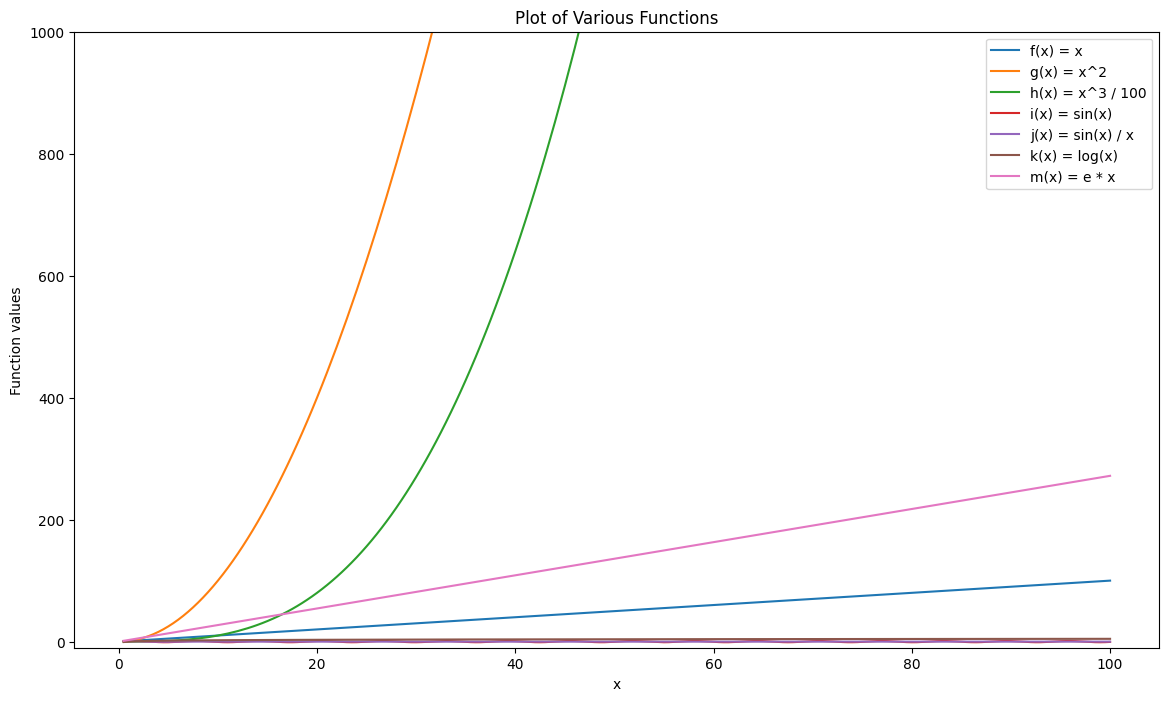

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain
x = np.arange(0.5, 100.5, 0.5)

# Define the functions
functions = [
    (lambda x: x, 'f(x) = x'),
    (lambda x: x**2, 'g(x) = x^2'),
    (lambda x: x**3 / 100, 'h(x) = x^3 / 100'),
    (lambda x: np.sin(x), 'i(x) = sin(x)'),
    (lambda x: np.sin(x) / x, 'j(x) = sin(x) / x'),
    (lambda x: np.log(x), 'k(x) = log(x)'),
    (lambda x: np.e * x, 'm(x) = e * x')
]

# Create the plot
plt.figure(figsize=(14, 8))

# Plot each function
for func, label in functions:
    plt.plot(x, func(x), label=label)

# Adding titles and labels
plt.title('Plot of Various Functions')
plt.xlabel('x')
plt.ylabel('Function values')
plt.legend()
plt.ylim(-10, 1000)  # Set y-axis limits for better visualization

# Show the plot
plt.show()


Q10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [7]:
import numpy as np
import pandas as pd

# Generate a 20x5 matrix of random numbers between 1 and 2
data = np.random.uniform(1, 2, size=(20, 5))

# Create a Pandas DataFrame
df = pd.DataFrame(data, columns=['a', 'b', 'c', 'd', 'e'])

# Find the column with the highest standard deviation
column_with_highest_std = df.std().idxmax()
print("Column with highest standard deviation:", column_with_highest_std)

# Find the row with the lowest mean
row_with_lowest_mean = df.mean(axis=1).idxmin()
print("Row with lowest mean:", row_with_lowest_mean)


Column with highest standard deviation: e
Row with lowest mean: 16


Q11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [6]:
# Add a new column "f" which is the sum of "a", "b", "c", "d", "e"
df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

# Create a new column "g" based on the value in "f"
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

# Find the number of rows where "g" is "LT8"
count_lt8 = (df['g'] == 'LT8').sum()
print("Number of rows where g is LT8:", count_lt8)

# Find the standard deviation of "f" for rows where "g" is "LT8" and "GT8"
std_lt8 = df[df['g'] == 'LT8']['f'].std()
std_gt8 = df[df['g'] == 'GT8']['f'].std()
print("Standard deviation of f for LT8:", std_lt8)
print("Standard deviation of f for GT8:", std_gt8)


NameError: name 'df' is not defined

Q12. Write a small piece of code to explain broadcasting in numpy.

Broadcasting in NumPy allows us to perform arithmetic operations on arrays of different shapes in a way that makes sense, without having to explicitly resize or replicate them. Here's a small piece of code to explain how broadcasting works in NumPy:

In [5]:
import numpy as np

# Create two arrays of different shapes
a = np.array([1, 2, 3])      # Shape (3,)
b = np.array([[10], [20], [30]])  # Shape (3, 1)

# Broadcasting addition
result = a + b

# Print the arrays and the result
print("Array a:")
print(a)
print("Shape of a:", a.shape)

print("\nArray b:")
print(b)
print("Shape of b:", b.shape)

print("\nResult of a + b:")
print(result)
print("Shape of result:", result.shape)


Array a:
[1 2 3]
Shape of a: (3,)

Array b:
[[10]
 [20]
 [30]]
Shape of b: (3, 1)

Result of a + b:
[[11 12 13]
 [21 22 23]
 [31 32 33]]
Shape of result: (3, 3)


Explanation:

Array a has shape (3,), meaning it is a 1-dimensional array with 3 elements.
Array b has shape (3, 1), meaning it is a 2-dimensional array with 3 rows and 1 column.
When adding a and b, NumPy broadcasts the smaller array (a) to match the shape of the larger array (b).
Broadcasting works by "stretching" the smaller array along the dimension(s) of size 1 to match the size of the larger array. In this case:

a is stretched from shape (3,) to shape (3, 3).
The addition is performed element-wise after broadcasting, resulting in an array of shape (3, 3).
Broadcasting allows for efficient and concise code when working with arrays of different shapes.

Q13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [4]:
import numpy as np

def custom_argmin(arr):
    if len(arr) == 0:
        raise ValueError("The array cannot be empty")
        
    min_index = 0
    min_value = arr[0]
    
    for i in range(1, len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_index = i
    
    return min_index

# Test the function
arr = np.array([3, 1, 4, 1, 5, 9, 2, 6, 5])
print("Array:", arr)

# Using the custom function
min_index_custom = custom_argmin(arr)
print("Index of the minimum element using custom_argmin:", min_index_custom)

# Verifying with np.argmin
min_index_np = np.argmin(arr)
print("Index of the minimum element using np.argmin:", min_index_np)

# Ensure both results match
assert min_index_custom == min_index_np, "The results do not match!"


Array: [3 1 4 1 5 9 2 6 5]
Index of the minimum element using custom_argmin: 1
Index of the minimum element using np.argmin: 1
